# Study of Josef Albers' *Interaction of Color*

Source material: *Interaction of Color* (50th Anniversary Edition) by Josef Albers

In [ ]:
#the following is from: https://nickwan.github.io/pycairo-and-colab/

# This advice comes from https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

import cairo
from google.colab import files
from IPython.display import SVG, display, Image

def show_svg(file):
    display(SVG(filename=file))


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import numpy as np
from matplotlib.colors import to_rgb
palette_arg =  np.array(
    [# From https://colorhunt.co/palette/178369
        to_rgb("#ffb6b6"), 
        to_rgb("#fde2e2"), 
        to_rgb("#aacfcf"), 
        to_rgb("#679b9b"),
     # From https://colorhunt.co/palette/177808
        to_rgb("#856c8b"), 
        to_rgb("#d4ebd0"), 
        to_rgb("#a4c5c6"),
        to_rgb("#ffeb99"),
     # From https://colorhunt.co/palette/178346
        to_rgb("#faf4ff"),
        to_rgb("#f3c623"),
        to_rgb("#844685"),
        to_rgb("#10375c")
    ])

# Cairo Tutorial for Python Programmers
## By Michael Urman
Source: http://www.tortall.net/mu/wiki/CairoTutorial

## Intro to Cairo Verbs

### Stroke

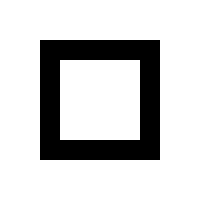

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    
    context.set_line_width(0.1)
    context.set_source_rgb(0, 0, 0)
    context.rectangle(0.25, 0.25, 0.5, 0.5)
    context.stroke()

show_svg("example.svg")

### Fill

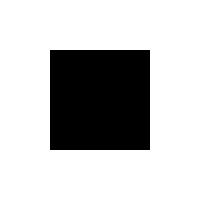

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    
    context.set_source_rgb(0, 0, 0)
    context.rectangle(0.25, 0.25, 0.5, 0.5)
    context.fill()

show_svg("example.svg")

### Text or Glyphs

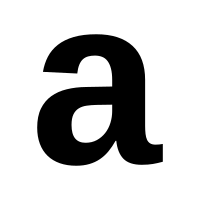

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)

    context.set_source_rgb(0.0, 0.0, 0.0)
    context.select_font_face("Georgia",
                             cairo.FONT_SLANT_NORMAL, 
                             cairo.FONT_WEIGHT_BOLD)
    context.set_font_size(1.2)
    x_bearing, y_bearing, width, height = context.text_extents("a")[:4]
    
    # Lol I have no idea!
    context.move_to(0.5 - width / 2 - x_bearing, 0.5 - height / 2 - y_bearing)
    context.show_text("a")

show_svg("example.svg")

### Paint

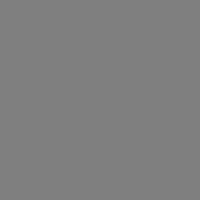

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)

    context.set_source_rgb(0, 0, 0)
    context.paint_with_alpha(0.5)

show_svg("example.svg")

### Mask

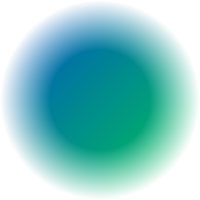

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)

    linear = cairo.LinearGradient(0, 0, 1, 1)
    linear.add_color_stop_rgb(0, 0, 0.3, 0.8)
    linear.add_color_stop_rgb(1, 0, 0.8, 0.3)

    radial = cairo.RadialGradient(0.5, 0.5, 0.25, 0.5, 0.5, 0.75)

    # why are there five arguments?
    radial.add_color_stop_rgba(0, 0, 0, 0, 1)
    radial.add_color_stop_rgba(0.5, 0, 0, 0, 0)

    context.set_source(linear)
    context.mask(radial)

show_svg("example.svg")

## Drawing with Cairo

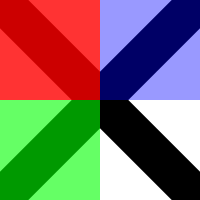

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)
    
    ## Big X
    # Top-Left -> Bottom-Right
    context.set_source_rgb(0, 0, 0)
    context.move_to(0, 0)
    context.line_to(1, 1)
    # Top-Right -> Bottom-Left
    context.move_to(1, 0)
    context.line_to(0, 1)
    context.set_line_width(0.2)
    context.stroke()

    ## Red Top-Left Rectangle
    context.rectangle(0, 0, 0.5, 0.5)
    context.set_source_rgba(1, 0, 0, 0.8)
    context.fill()

    ## Green Bottom-Right Rectangle
    context.rectangle(0, 0.5, 0.5, 0.5)
    context.set_source_rgba(0, 1, 0, 0.6)
    context.fill()

    ## Blue Top-Right Rectangle
    context.rectangle(0.5, 0, 0.5, 0.5)
    context.set_source_rgba(0, 0, 1, 0.4)
    context.fill()



show_svg("example.svg")

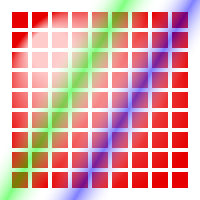

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)

    radial = cairo.RadialGradient(0.25, 0.25, 0.1, 0.5, 0.5, 0.5)
    radial.add_color_stop_rgb(0, 1.0, 0.8, 0.8)
    radial.add_color_stop_rgb(1, 0.9, 0, 0)

    for i in range(1, 10):
        for j in range(1, 10):
            context.rectangle(i/10 - 0.04, j/10 - 0.04, 0.08, 0.08)
    context.set_source(radial)
    context.fill()

    linear = cairo.LinearGradient(0.25, 0.35, 0.75, 0.65)
    linear.add_color_stop_rgba(0.00, 1, 1, 1, 0)
    linear.add_color_stop_rgba(0.25, 0, 1, 0, 0.5)
    linear.add_color_stop_rgba(0.50, 1, 1, 1, 0)
    linear.add_color_stop_rgba(0.75, 0, 0, 1, 0.5)
    linear.add_color_stop_rgba(1.00, 1, 1, 1, 0)

    context.rectangle(0, 0, 1, 1)
    context.set_source(linear)
    context.fill()

show_svg("example.svg")

Creating a Path

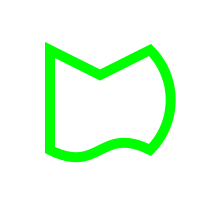

In [ ]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    context.scale(200, 200)

    
    context.set_source_rgb(0, 1, 0)

    # Move to (absolute)
    context.move_to(0.25, 0.25)

    # Line to (absolute)
    context.line_to(0.5, 0.375)

    # Line to (relative)
    context.rel_line_to(0.25, -0.125)

    # Arc (only absolute)
    context.arc(0.5, 0.5, 0.25 * np.sqrt(2), -0.25*np.pi, 0.25*np.pi)

    # Curve (relative, but absolute also available)
    context.rel_curve_to(-0.25, -0.125, -0.25, 0.125, -0.5, 0)

    # Close the path
    context.close_path()

    context.set_line_width(0.05)
    context.stroke()

show_svg("example.svg")

My own practice

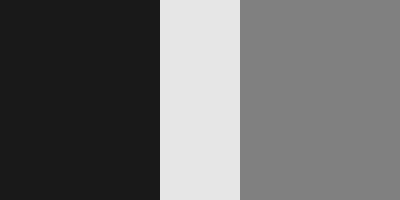

In [ ]:
with cairo.SVGSurface("example.svg", 400, 200) as surface:
    context = cairo.Context(surface)
    context.scale(400, 200)
    # Background
    context.set_source_rgb(0.9, 0.9, 0.9)
    context.paint()

    context.set_source_rgb(0.1, 0.1, 0.1)
    context.rectangle(0, 0, 0.4, 1)
    context.fill()

    context.set_source_rgb(0.5, 0.5, 0.5)
    context.rectangle(0.6, 0, 0.4, 1)
    context.fill()


show_svg("example.svg")

# Albers' *Do's and Don't*'s

## Do this!

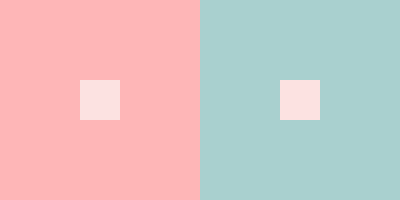

In [ ]:
small_sq_side_prop = 0.1

with cairo.SVGSurface("example.svg", 400, 200) as surface:
    context = cairo.Context(surface)
    context.scale(400, 200)

    context.set_source_rgb(*palette_arg[0])
    context.rectangle(0, 0, 0.5, 1)
    context.fill()

    context.set_source_rgb(*palette_arg[2])
    context.rectangle(0.5, 0, 0.5, 1)
    context.fill()

    context.set_source_rgb(*palette_arg[1])
    context.rectangle(0.25-small_sq_side_prop/2, 0.5-small_sq_side_prop,
                      small_sq_side_prop, 2*small_sq_side_prop)
    context.fill()

    context.rectangle(0.75-small_sq_side_prop/2, 0.5-small_sq_side_prop,
                      small_sq_side_prop, 2*small_sq_side_prop)
    context.fill()


show_svg("example.svg")

## Don't do this!

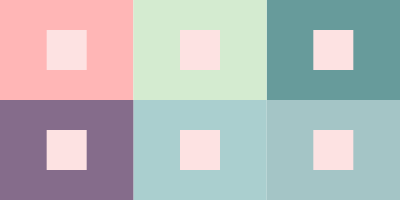

In [ ]:
small_sq_side_prop = 0.1

with cairo.SVGSurface("example.svg", 400, 200) as surface:
    context = cairo.Context(surface)
    context.scale(400, 200)

    context.set_source_rgb(*palette_arg[0])
    context.rectangle(0, 0, 1/3, 1/2)
    context.fill()

    context.set_source_rgb(*palette_arg[1])
    context.rectangle((1/6)-small_sq_side_prop/2, (1/4)-small_sq_side_prop,
                      small_sq_side_prop, 2*small_sq_side_prop)
    context.fill()

    for i, color_idx in enumerate(range(2, 7), 1):
        context.set_source_rgb(*palette_arg[color_idx])
        context.rectangle(((i % 3) * 1/3), ((i % 2) * 1/2), 
                          1/3, 1/2)
        context.fill()

        context.set_source_rgb(*palette_arg[1])
        context.rectangle((1/6) + ((i % 3) * 1/3) - small_sq_side_prop/2, 
                          (1/4) + ((i % 2) * 1/2) - small_sq_side_prop,
                          small_sq_side_prop, 2*small_sq_side_prop)
        context.fill()

show_svg("example.svg")

## What's the difference?

The second has too many comparisons - in Albers' words, "the simultaneous influence from too many directions."